In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# TASK 1 : Import a 311 NYC service request.

In [2]:
df = pd.read_csv("311_Service_Requests.csv")

C:\Users\tarun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.shape

(300698, 53)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [5]:
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


In [6]:
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [7]:
# Removing the coloumns for further analysis
for column in df.columns:
    if df[column].isnull().sum()>250000:
        df.drop([column],axis=1,inplace=True)

In [8]:
df.shape

(300698, 39)

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(245664, 39)

In [11]:
# Checking for the null values
df.isnull().sum()

Unique Key                        0
Created Date                      0
Closed Date                       0
Agency                            0
Agency Name                       0
Complaint Type                    0
Descriptor                        0
Location Type                     0
Incident Zip                      0
Incident Address                  0
Street Name                       0
Cross Street 1                    0
Cross Street 2                    0
Address Type                      0
City                              0
Facility Type                     0
Status                            0
Due Date                          0
Resolution Description            0
Resolution Action Updated Date    0
Community Board                   0
Borough                           0
X Coordinate (State Plane)        0
Y Coordinate (State Plane)        0
Park Facility Name                0
Park Borough                      0
School Name                       0
School Number               

In [12]:
df.duplicated().value_counts()

False    245664
dtype: int64

In [ ]:
# TASK 2:
# i) Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype

In [13]:
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])

In [14]:
df.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Address Type                              object
City                                      object
Facility Type                             object
Status                                    object
Due Date                                  object
Resolution Description                    object
Resolution Action Updated Date            object
Community Board     

In [ ]:
# ii) Create a new column ‘Request_Closing_Time’ 

In [15]:
df['Request_Closing_Time'] = df['Closed Date']-df['Created Date']

In [16]:
df.dtypes

Unique Key                                  int64
Created Date                       datetime64[ns]
Closed Date                        datetime64[ns]
Agency                                     object
Agency Name                                object
Complaint Type                             object
Descriptor                                 object
Location Type                              object
Incident Zip                              float64
Incident Address                           object
Street Name                                object
Cross Street 1                             object
Cross Street 2                             object
Address Type                               object
City                                       object
Facility Type                              object
Status                                     object
Due Date                                   object
Resolution Description                     object
Resolution Action Updated Date             object


In [ ]:
# TASK 3: Major Insights

<AxesSubplot:title={'center':'Most common Complaints'}>

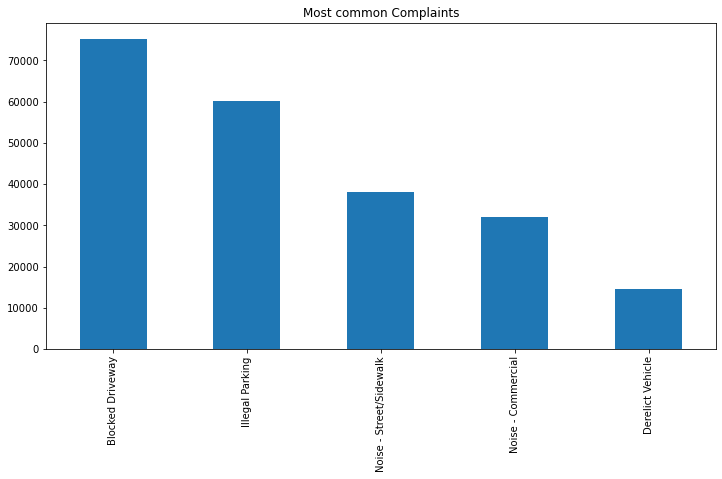

In [17]:
#Most frequent Complaints
(df['Complaint Type'].value_counts()).head().plot(kind='bar',
                    figsize=(12,6), title = 'Most common Complaints')

<AxesSubplot:title={'center':'Least frequent Complaints'}>

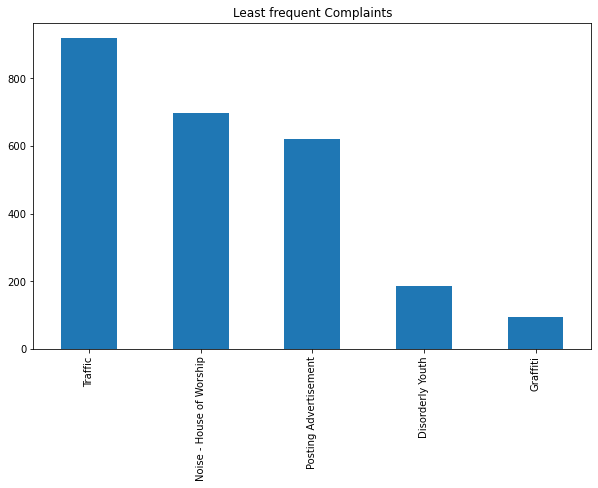

In [18]:
#Least frequent Complaints
(df['Complaint Type'].value_counts()).tail().plot(kind='bar',
                    figsize=(10,6), title = 'Least frequent Complaints')

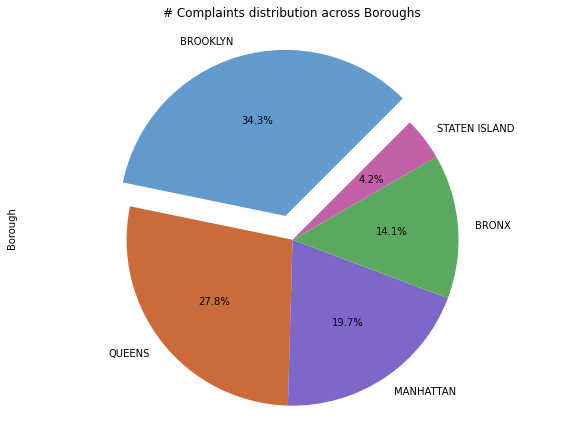

In [19]:
# Complaints distribution across Boroughs
colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa','#a7993f','#cc566a']
df['Borough'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                        explode = (0.15, 0, 0, 0, 0), startangle=45, shadow=False, colors = colors,
                        figsize = (8,6))
#plt.legend(title='BOROUGH', loc='upper right', bbox_to_anchor=(1.5,1))
plt.axis('equal')
plt.title('# Complaints distribution across Boroughs\n')
plt.tight_layout()
plt.show()

In [20]:
# Analysis for Brooklyn borough which has highest number of complaints
df_Brooklyn = df[df['Borough']=='BROOKLYN']

In [21]:
# Shape
df_Brooklyn.shape

(84197, 40)

<AxesSubplot:title={'center':'Most Frequent Complaints in Brooklyn'}>

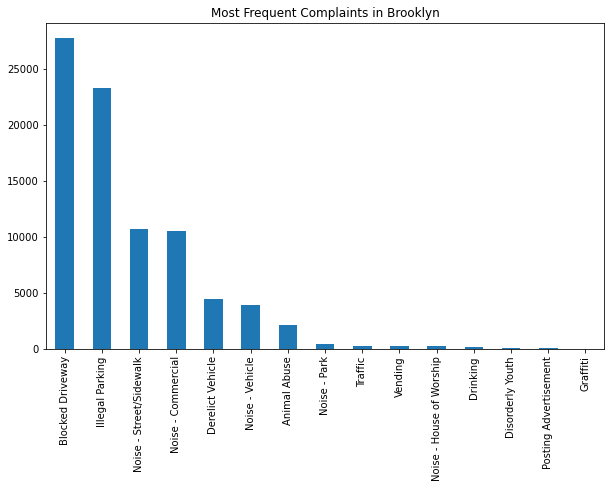

In [22]:
(df_Brooklyn['Complaint Type'].value_counts()).head(25).plot(kind='bar',
                                                    figsize=(10,6),title = 'Most Frequent Complaints in Brooklyn')

<AxesSubplot:title={'center':'Location Type vs # Complaints'}>

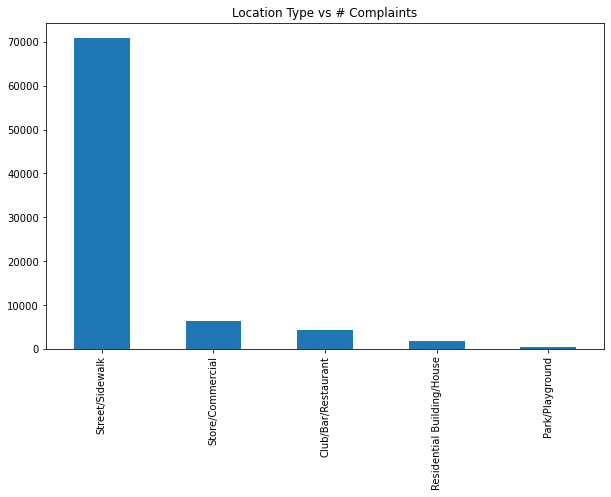

In [23]:
# Location type vs complaints
(df_Brooklyn['Location Type'].value_counts()).head().plot(kind='bar',
                                                    figsize=(10,6),title = 'Location Type vs # Complaints')

In [24]:
#Anlysis of Most Frequent complaint in Brooklyn
df[df['Complaint Type'] == 'Blocked Driveway']['Descriptor'].value_counts()

No Access         55656
Partial Access    19635
Name: Descriptor, dtype: int64

In [25]:
df_Brook_blocked = df_Brooklyn[df_Brooklyn['Complaint Type'] == 'Blocked Driveway']

(-74.04994270070343, -73.84653002929657, 40.5645918345, 40.7464960955)

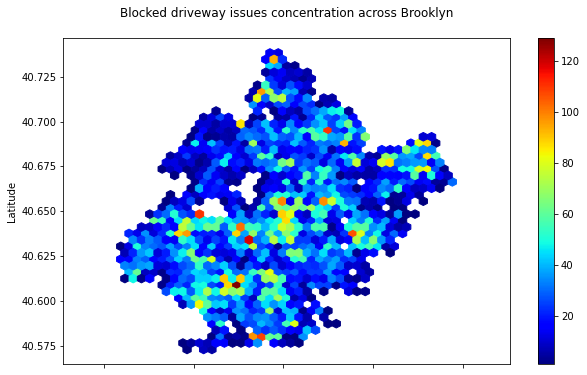

In [26]:
df_Brook_blocked.plot(
    kind='hexbin', x='Longitude', y='Latitude', gridsize=40,title = 'Blocked driveway issues concentration across Brooklyn\n',
    colormap='jet', mincnt=1, figsize=(10,6)).axis('equal')

In [ ]:
# TASK 4 : Order the complaint types based on the average ‘Request_Closing_Time’

In [27]:
grouped = df.groupby(['Location Type','Complaint Type']).mean()
grouped

Unique Key  \
Location Type              Complaint Type                           
Club/Bar/Restaurant        Drinking                  3.130877e+07   
                           Noise - Commercial        3.130618e+07   
Commercial                 Animal Abuse              3.153133e+07   
Highway                    Derelict Vehicle          3.131128e+07   
House and Store            Animal Abuse              3.136862e+07   
House of Worship           Noise - House of Worship  3.113124e+07   
Park/Playground            Animal Abuse              3.127793e+07   
                           Drinking                  3.121181e+07   
                           Noise - Park              3.121391e+07   
                           Vending                   3.115204e+07   
Parking Lot                Animal Abuse              3.125544e+07   
                           Posting Advertisement     3.176976e+07   
Residential Building       Animal Abuse              3.134608e+07   
Residential Building/House Animal Abuse              3.128035e+07   
                           Disorderly Youth          3.106959e+07   
                           Drinking                  3.129428e+07   
                           Graffiti                  3.113760e+07   
                           Posting Advertisement     3.128383e+07   
                           Vending                   3.115728e+07   
Roadway Tunnel             Derelict Vehicle          3.122022e+07   
Store/Commercial           Animal Abuse              3.124834e+07   
                           Disorderly Youth          3.130368e+07   
                           Drinking                  3.135428e+07   
                           Graffiti                  3.122638e+07   
                           Noise - Commercial        3.129136e+07   
                           Posting Advertisement     3.154459e+07   
                           Vending                   3.123893e+07   
Street/Sidewalk            Animal Abuse              3.128731e+07   
                           Blocked Driveway          3.136044e+07   
                           Derelict Vehicle          3.130455e+07   
                           Disorderly Youth          3.102154e+07   
                           Drinking                  3.120335e+07   
                           Graffiti                  3.135025e+07   
                           Illegal Parking           3.134209e+07   
                           Noise - Street/Sidewalk   3.121343e+07   
                           Noise - Vehicle           3.122525e+07   
                           Posting Advertisement     3.182194e+07   
                           Traffic                   3.132201e+07   
                           Vending                   3.124429e+07   
Subway Station             Animal Abuse              3.129543e+07   
Vacant Lot                 Derelict Vehicle          3.139663e+07   

                                                     Incident Zip  \
Location Type              Complaint Type                           
Club/Bar/Restaurant        Drinking                  10753.664557   
                           Noise - Commercial        10667.385033   
Commercial                 Animal Abuse              10362.310345   
Highway                    Derelict Vehicle          10236.500000   
House and Store            Animal Abuse              11027.061728   
House of Worship           Noise - House of Worship  10981.227011   
Park/Playground            Animal Abuse              10510.208333   
                           Drinking                  10823.052632   
                           Noise - Park              10692.574803   
                           Vending                   10614.142857   
Parking Lot                Animal Abuse              10824.078125   
                           Posting Advertisement     10310.857143   
Residential Building       Animal Abuse              10918.254902   
Residential Building/House Animal Abuse             

In [ ]:
# From the above data null hypothesis can be rejected

In [ ]:
# TASK 5 : Perform a statistical test 

In [28]:
contingency_table = pd.crosstab(df['Complaint Type'],df['Location Type'])

In [29]:
contingency_table

Location Type,Club/Bar/Restaurant,Commercial,Highway,House and Store,House of Worship,Park/Playground,Parking Lot,Residential Building,Residential Building/House,Roadway Tunnel,Store/Commercial,Street/Sidewalk,Subway Station,Vacant Lot
Complaint Type,,,,,,,,,,,,,,
Animal Abuse,0,29,0,81,0,24,64,204,4840,0,416,911,4,0
Blocked Driveway,0,0,0,0,0,0,0,0,0,0,0,75291,0,0
Derelict Vehicle,0,0,2,0,0,0,0,0,0,4,0,14414,0,57
Disorderly Youth,0,0,0,0,0,0,0,0,68,0,7,110,0,0
Drinking,316,0,0,0,0,19,0,0,274,0,71,327,0,0
Graffiti,0,0,0,0,0,0,0,0,54,0,29,12,0,0
Illegal Parking,0,0,0,0,0,0,0,0,0,0,0,60145,0,0
Noise - Commercial,15087,0,0,0,0,0,0,0,0,0,16933,0,0,0
Noise - House of Worship,0,0,0,0,696,0,0,0,0,0,0,0,0,0


In [30]:
Observed_Values = contingency_table.values 

In [31]:
from scipy import stats

In [32]:
b =stats.chi2_contingency(contingency_table)

In [33]:
Expected_Values = b[3]

In [34]:
from scipy.stats import chi2

In [35]:
p_value=1-chi2.cdf(x=b[0],df=1)

In [36]:
p_value

0.0

In [38]:
 # p_value is less than 0.05 so we reject the null hypothesis that Complaint Type and Location Type is not related